In [8]:
import wfdb
import gudhi

In [9]:
record = wfdb.rdrecord(record_name='data_original/mitdb/1.0.0/100', sampfrom=2000 ,sampto=3000)

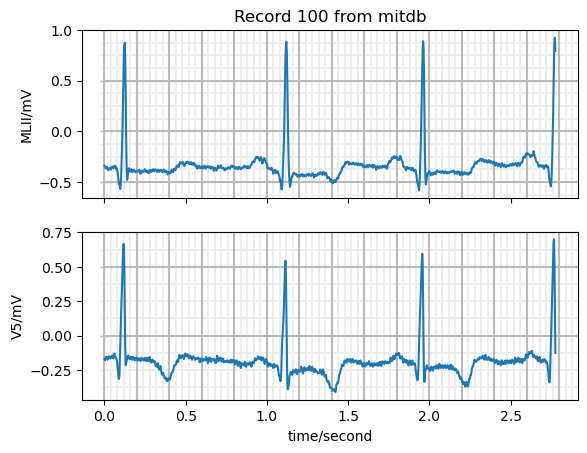

In [10]:
wfdb.plot_wfdb(record=record, title='Record 100 from mitdb', ecg_grids='all')

In [11]:
ecg_data = record.p_signal

In [12]:
print(len(ecg_data))
print(ecg_data)

1000
[[-0.34  -0.17 ]
 [-0.345 -0.18 ]
 [-0.36  -0.17 ]
 ...
 [ 0.875  0.555]
 [ 0.925  0.21 ]
 [ 0.795 -0.125]]


In [13]:
rips_complex = gudhi.RipsComplex(points=ecg_data.reshape(-1, 1))
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

In [14]:
persistence = simplex_tree.persistence()

In [15]:
print(persistence)

[(0, (0.0, inf)), (0, (0.0, 0.06500000000000006)), (0, (0.0, 0.06)), (0, (0.0, 0.05500000000000005)), (0, (0.0, 0.045)), (0, (0.0, 0.039999999999999994)), (0, (0.0, 0.03500000000000003)), (0, (0.0, 0.034999999999999976)), (0, (0.0, 0.030000000000000027)), (0, (0.0, 0.03)), (0, (0.0, 0.025000000000000022)), (0, (0.0, 0.024999999999999994)), (0, (0.0, 0.020000000000000018)), (0, (0.0, 0.020000000000000018)), (0, (0.0, 0.020000000000000004)), (0, (0.0, 0.01999999999999999)), (0, (0.0, 0.01999999999999999)), (0, (0.0, 0.01999999999999999)), (0, (0.0, 0.019999999999999907)), (0, (0.0, 0.019999999999999907)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015000000000000013)), (0, (0.0, 0.015)), (0, (0.0, 0.014999999999999958)), (0, (0.0, 0.014999999999999902)), (0, (0.0, 0.010000000000000009

usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

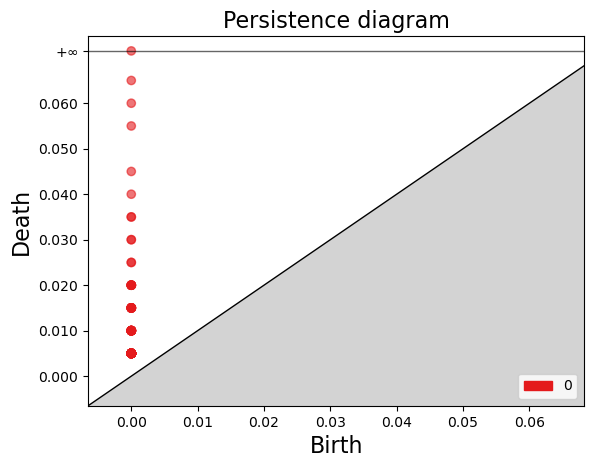

In [16]:
gudhi.plot_persistence_diagram(persistence)

<AxesSubplot:title={'center':'Persistence barcode'}>

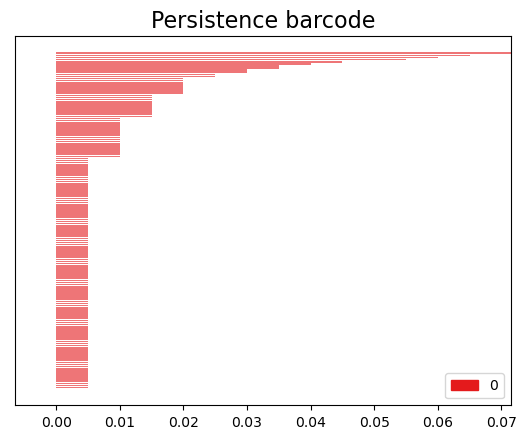

In [17]:
gudhi.plot_persistence_barcode(persistence)